In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from __future__ import print_function, division 

In [4]:
def exp_decay(x, A, t, y0):
    return A * np.exp(-x / t) + y0

In [5]:
t = 200.
A = 1/t 
y0 = 0.

xmax = 1200
mc_events = 10000

#### Hit & Miss sampling method

In [12]:
rnd1 = np.random.rand(mc_events)
rnd2 = np.random.rand(mc_events)
yrnd = A*rnd1
xrnd = xmax*rnd2
data = x[np.where(y < exp_decay(x, A, t, y0))]

In [13]:
print (data)

[ 286.59261832  283.2156352    86.18255604 ...,  461.23345161   87.28217986
   86.41544118]


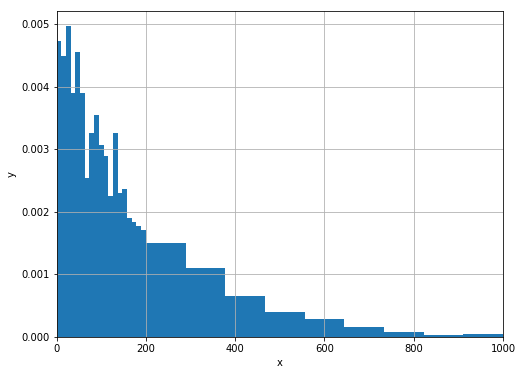

In [22]:
x = np.arange(0, 1000, 0.1)
y = exp_decay(x, A, t, y0)

fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
#ax.hist(data,bins = 1000)

#ax.plot(x, y, lw =2 , label="Pdf")
#ax.hist(data, bins = np.linspace(0,1000, 10))
ax.hist(data, bins = np.concatenate((np.linspace(0, 200, 20, endpoint=True),np.linspace(200,1000, 10))), normed=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(0,1000)
plt.show()